# Решающие деревья

In [1]:
import numpy as np
import math
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_accuracy_height(train, test):
    ds_train = pd.read_csv(train)
    ds_test = pd.read_csv(test)

    y_train = ds_train['y']
    X_train = ds_train.drop(columns=['y'])

    y_test = ds_test['y']
    X_test = ds_test.drop(columns=['y'])

    accs = []
    for max_depth in range(1, 25):
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accs.append(accuracy_score(y_test, pred))
    best_height_accuracy = np.argmax(accs) + 1
    return best_height_accuracy
    

In [3]:
best_heights = []
for index in range(1, 22):
    name_train = str(index)+"_train.csv"
    name_test = str(index)+"_test.csv"
    if index < 10:
        name_train = "0" + name_train
        name_test = "0" + name_test
    name_train = "DT_csv/" + name_train
    name_test = "DT_csv/" + name_test
    best_heights.append(get_accuracy_height(name_train, name_test))
print(best_heights)

[3, 9, 1, 5, 1, 3, 3, 2, 4, 4, 1, 9, 7, 6, 1, 1, 7, 5, 7, 7, 9]


In [4]:
print("The tallest tree:",np.argmax(best_heights) + 1, "Height:",max(best_heights))
print("The lowest tree:",np.argmin(best_heights) + 1, "Height:",min(best_heights))

The tallest tree: 2 Height: 9
The lowest tree: 3 Height: 1


In [16]:
def draw_graphic(train, test):
    ds_train = pd.read_csv(train)
    ds_test = pd.read_csv(test)

    y_train = ds_train['y']
    X_train = ds_train.drop(columns=['y'])

    y_test = ds_test['y']
    X_test = ds_test.drop(columns=['y'])

    accs_train = []
    heights = []

    criterion = ['gini', 'entropy']
    splitter = ['best', 'random']

    heights = list(range(1, 30))
    for c in criterion:
        for s in splitter:
            accs = []
            for max_depth in range(1, 30):
                clf = DecisionTreeClassifier(max_depth=max_depth, criterion=c, splitter=s, random_state=42)
                clf.fit(X_train, y_train)
                pred = clf.predict(X_train)
                accs.append(accuracy_score(y_train, pred))
            plt.plot(heights, accs, label='criterion=' + c + ', splitter=' + s)
            
    plt.gca().get_lines()[0].set_color("black")
    plt.gca().get_lines()[1].set_color("red")
    plt.gca().get_lines()[2].set_color("blue")
    plt.gca().get_lines()[3].set_color("green")
    plt.legend()
    plt.title('X_train accuraccy')
    plt.show()
    
    for c in criterion:
        for s in splitter:
            accs = []
            for max_depth in range(1, 30):
                clf = DecisionTreeClassifier(max_depth=max_depth, criterion=c, splitter=s)
                clf.fit(X_train, y_train)
                pred = clf.predict(X_test)
                accs.append(accuracy_score(y_test, pred))
            plt.plot(heights, accs, label='criterion=' + c + ', splitter=' + s)
    plt.gca().get_lines()[0].set_color("black")
    plt.gca().get_lines()[1].set_color("red")
    plt.gca().get_lines()[2].set_color("blue")
    plt.gca().get_lines()[3].set_color("green")
    plt.legend()
    plt.title('X_test accuraccy')
    plt.show()

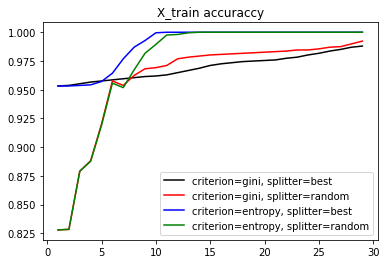

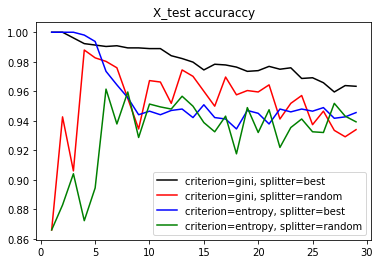

In [17]:
draw_graphic('DT_csv/03_train.csv', 'DT_csv/03_test.csv')

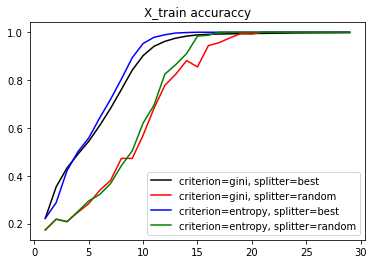

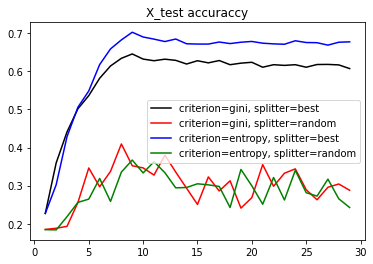

In [18]:
draw_graphic('DT_csv/02_train.csv', 'DT_csv/02_test.csv')

# Ансамбль

In [19]:
def ensemble_score(train, test):
    ds_train = pd.read_csv(train)
    ds_test = pd.read_csv(test)

    y_test = ds_test['y']
    X_test = ds_test.drop(columns=['y'])

    y = ds_train['y']
    X = ds_train.drop(columns=['y'])

    n_trees = 10
    n_samples_rate = 0.5
    m = int(n_samples_rate * len(ds_train))
    trees = [(DecisionTreeClassifier(), ds_train.sample(n=m)) for _ in range(n_trees)]

    y_pred_test = []
    y_pred_train = []
    for tree, data in trees:
        y_train = data['y']
        X_train = data.drop(columns=['y'])
        tree.fit(X_train, y_train)
        y_pred_test.append(tree.predict(X_test))
        y_pred_train.append(tree.predict(X))
    predicted_test = []
    for i in range(len(y_pred_test[0])):
        res = []
        for j in range(len(y_pred_test)):
            res.append(y_pred_test[j][i])
        predicted_test.append(np.bincount(res).argmax())

    predicted_train = []
    for i in range(len(y_pred_train[0])):
        res = []
        for j in range(len(y_pred_train)):
            res.append(y_pred_train[j][i])
        predicted_train.append(np.bincount(res).argmax())

    return accuracy_score(y, predicted_train), accuracy_score(y_test, predicted_test)

In [20]:
res=[]
for index in range(1, 22):
    name_train = str(index)+"_train.csv"
    name_test = str(index)+"_test.csv"
    if index < 10:
        name_train = "0" + name_train
        name_test = "0" + name_test
    name_train = "DT_csv/" + name_train
    name_test = "DT_csv/" + name_test
    res.append((index, ensemble_score(name_train, name_test)))

## Смотрим на значение accuracy на ансамбле размера 10, с n_samples_rate = 0.5

In [21]:
for i, (train_acc, test_acc) in res:
    print("Data set №",i,", Train accuracy:",train_acc, ", Test accuracy", test_acc)

Data set № 1 , Train accuracy: 0.9778977126702647 , Test accuracy 0.9961449498843485
Data set № 2 , Train accuracy: 0.9595419847328245 , Test accuracy 0.6414758269720102
Data set № 3 , Train accuracy: 0.9807135969141755 , Test accuracy 0.9922854387656702
Data set № 4 , Train accuracy: 0.9819130434782609 , Test accuracy 0.9892173913043478
Data set № 5 , Train accuracy: 0.987012987012987 , Test accuracy 0.9978354978354979
Data set № 6 , Train accuracy: 0.9845474613686535 , Test accuracy 0.9928256070640177
Data set № 7 , Train accuracy: 0.9744186046511628 , Test accuracy 0.9948837209302326
Data set № 8 , Train accuracy: 0.9854469854469855 , Test accuracy 0.9875259875259875
Data set № 9 , Train accuracy: 0.9607843137254902 , Test accuracy 0.8098039215686275
Data set № 10 , Train accuracy: 0.9714285714285714 , Test accuracy 0.993963782696177
Data set № 11 , Train accuracy: 0.9734406438631791 , Test accuracy 0.9955734406438632
Data set № 12 , Train accuracy: 0.9733370754981757 , Test accurac

In [22]:
def ensemble_score_draw(train, test, n_trees, n_samples_rate=0.3):
    ds_train = pd.read_csv(train)
    ds_test = pd.read_csv(test)

    y_test = ds_test['y']
    X_test = ds_test.drop(columns=['y'])

    y = ds_train['y']
    X = ds_train.drop(columns=['y'])

    m = int(n_samples_rate * len(ds_train))
    trees = [(DecisionTreeClassifier(), ds_train.sample(n=m)) for _ in range(n_trees)]

    y_pred_test = []
    y_pred_train = []
    for tree, data in trees:
        y_train = data['y']
        X_train = data.drop(columns=['y'])
        tree.fit(X_train, y_train)
        y_pred_test.append(tree.predict(X_test))
        y_pred_train.append(tree.predict(X))
    predicted_test = []
    for i in range(len(y_pred_test[0])):
        res = []
        for j in range(len(y_pred_test)):
            res.append(y_pred_test[j][i])
        predicted_test.append(np.bincount(res).argmax())

    predicted_train = []
    for i in range(len(y_pred_train[0])):
        res = []
        for j in range(len(y_pred_train)):
            res.append(y_pred_train[j][i])
        predicted_train.append(np.bincount(res).argmax())

    return accuracy_score(y, predicted_train), accuracy_score(y_test, predicted_test)

## Графики зависимости точности от количества деревьев в ансамбле, а также n_samples_rate

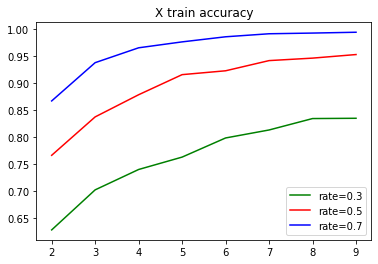

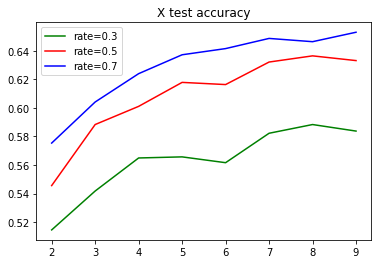

In [23]:
train_name = 'DT_csv/02_train.csv'
test_name = 'DT_csv/02_test.csv'



rates = [0.3, 0.5, 0.7]

for rate in rates:
    trees = []
    scores_train = []
    scores_test = []
    for n_trees in range(2, 10):
        trees.append(n_trees)
        res = ensemble_score_draw(train_name, test_name, n_trees, n_samples_rate=rate)
        scores_train.append(res[0])
        scores_test.append(res[1])
    plt.plot(trees, scores_train, label = 'rate=' + str(rate))
plt.title("X train accuracy")
plt.gca().get_lines()[0].set_color("green")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[2].set_color("blue")
plt.legend()
plt.show()


for rate in rates:
    trees = []
    scores_train = []
    scores_test = []
    for n_trees in range(2, 10):
        trees.append(n_trees)
        res = ensemble_score_draw(train_name, test_name, n_trees, n_samples_rate=rate)
        scores_train.append(res[0])
        scores_test.append(res[1])
    plt.plot(trees, scores_test, label = 'rate=' + str(rate))
plt.gca().get_lines()[0].set_color("green")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[2].set_color("blue")    
plt.title("X test accuracy")
plt.legend()
plt.show()
